# Feature detection

## Harris Corner detection

As always we start with the imports

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

As a start we will use the same checkerboard image as earlier.

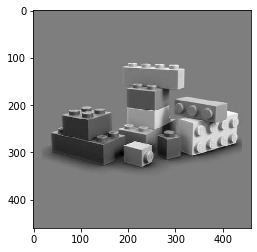

In [23]:
img = cv2.imread('Lego.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap = 'gray')

In [30]:
max_thresh = 100
source_window = 'Source image'
corners_window = 'Corners detected'

def cornerHarris_demo(val):
    thresh = val
    
    # Detector parameters
    blockSize = 2
    apertureSize = 3
    k = 0.04
   
    # Detecting corners
    dst = cv2.cornerHarris(img_gray, blockSize, apertureSize, k)
    
    # Normalizing
    dst_norm = np.empty(dst.shape, dtype=np.float32)
    cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    dst_norm_scaled = cv2.convertScaleAbs(dst_norm)
    
    # Drawing a circle around corners
    for i in range(dst_norm.shape[0]):
        for j in range(dst_norm.shape[1]):
            if int(dst_norm[i,j]) > thresh:
                cv2.circle(dst_norm_scaled, (j,i), 1, (255), 3)
    
    # Showing the result
    cv2.namedWindow(corners_window)
    cv2.imshow(corners_window, dst_norm_scaled)

# Create a window and a trackbar
cv2.namedWindow(source_window)
thresh = 50 # initial threshold
cv2.createTrackbar('Threshold: ', source_window, thresh, max_thresh, cornerHarris_demo)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow(source_window, img)
cornerHarris_demo(thresh)

k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

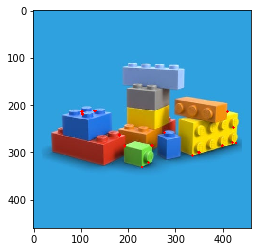

In [41]:
img = cv2.imread('Lego.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# plt.imshow(img_gray, cmap = 'gray')
thresh = 100
corners = cv2.cornerHarris(img_gray, 2, 3, 0.042)
# Normalizing
corners_norm = np.empty(corners.shape, dtype=np.float32)
cv2.normalize(corners, corners_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
corners_norm_scaled = cv2.convertScaleAbs(corners_norm)

# Drawing a circle around corners
for i in range(corners_norm.shape[0]):
    for j in range(corners_norm.shape[1]):
        if int(corners_norm[i,j]) > 90:
            cv2.circle(img, (j,i), 1, (255,0,0), 3)

plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [cv2.cornerHarris](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cornerharris). Afterwards we would like to draw the location of the detected corners on the image and display it.

In [ ]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray) #img - Input image, it should be grayscale and float32 type.
### Insert Harris Corner detector here ###
corners = cv2.cornerHarris(gray,1,3,5)
#result is dilated for marking the corners, not important
# corners = cv2.dilate(corners,None, iterations=5)
### Draw the detected corners in the original image here ###
img[corners>0.03*corners.max()]=[255,0,0]
cv2.imshow('corners',img)
# Display image
plt.imshow(img)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV the function is called [cv2.goodFeaturesToTrack](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#goodfeaturestotrack). 
Let's start with a different image this time.

In [ ]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
# b,g,r = cv2.split(img)
# img = cv2.merge([r,g,b])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

In [ ]:
img = cv2.imread('Lego.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray1 = gray.copy()
### Insert goodFeaturesToTrack detector here ###
corners2 = cv2.goodFeaturesToTrack(gray1, 25, 0.05, 20)
corners2 = np.float32(corners2)
### Draw the detected corners in the original image here ###
# print(corners2)
for item in corners2:
    x,y = item[0]
    cv2.circle(img,(x,y),5,255,-1)
# Display image
plt.imshow(img)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

In [ ]:
img3 = cv2.imread('Lego.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
# plt.imshow(img3)
gray3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
gray3 = np.float32(gray3)
# plt.imshow(gray3, cmap = 'gray')

## Insert Harris Corner detector here ###
# cv2.cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) → dst
corners3 = cv2.cornerHarris(gray3,5,3,8)
# corners3 = np.float32(corners3)
# print(corners3)
#result is dilated for marking the corners, not important
# corners3 = cv2.dilate(corners3, None, iterations=5)
### Draw the detected corners in the original image here ###
img[corners3>0.3*corners3.max()]=[255,0,0]
cv2.imshow('corners3',img3)
# # Display image
plt.imshow(img3)
